In [1]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
#loading json file
data = json.load(open("musicFixed.json"))
songs = data['Music Data']['songs']
df = pd.DataFrame(songs)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
803,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
804,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
805,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [117]:
#scale data
features = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_charts', "in_shazam_charts", 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'liveness_%', 'speechiness_%']

X = df.loc[:, features].values
y = df.loc[:,['streams']].values
y = y.astype('int64')

In [118]:
#Random Forest to find importance numbers
model = RandomForestClassifier()
model.fit(X, y)

features2 = features
importances = model.feature_importances_
indicies = np.argsort(importances)

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


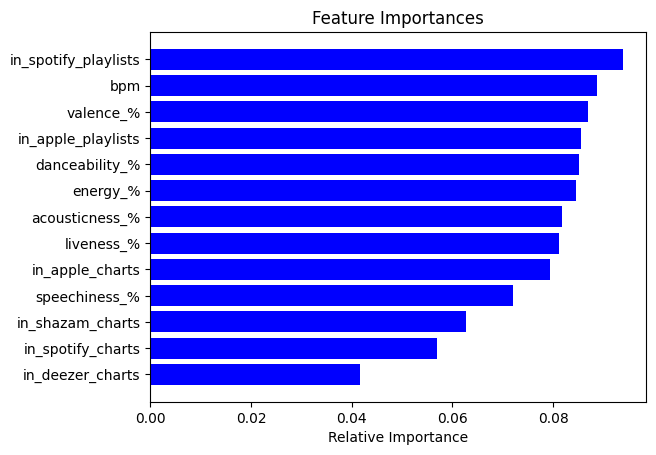

In [119]:
#graph feature importances for model to better understand what is important when running model
plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative Importance')
plt.show()

Graphing the importance of the features is important to know what makes a song popular, and what makes a song pop on the charts.
We see a couple of things:
  - Song wise, we find that valence%, bpm, and energy% are the top 3 things in a song that hooks people into a song and makes it popular...
      - valence%: The musical positiveness conveyed by a track.
      - bpm: Beats per minute - a measure of tempo in music.
      - energy%: The perceived energy of a track.
      - danceability%: A measure of how suitable a track is for dancing.

  - Outside of the music, the importance shows that you would want your song in Spotify/Apple Music playlists. This would mean that your song will be played
  over and over again. The data shows that people, instead of looking up a song one-by-one, would just put your song in a playlist and would be played a lot.
      - Shows that Deezer and Shazam charts aren't as important, probably not as used as the two streaming giants.

In [120]:
#Importing more libraries
from sklearn.model_selection import train_test_split

In [121]:
print(X.shape, y.shape)

#move 80% of the data to the training data, and 20% of the data to the test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(807, 13) (807, 1)


In [122]:
X_train.shape, y_train.shape

((645, 13), (645, 1))

In [123]:
X_test.shape, y_test.shape

((162, 13), (162, 1))

In [124]:
#Now create Linear Regression Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.astype('int64')

In [127]:
#Model performance
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, Y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, Y_pred))

Coefficients: [[  35328.786483   4545128.60975766 2586073.73565118  -47743.33922607
  -649420.86085657 -590953.53088243 -123813.1857943   318093.309539
  -947770.53900745 -642092.0150405   888251.54704928  553243.90100953
  -273025.07263664]]
Intercept: [1.80151581e+08]
Mean Squared Error: 77522839231807792.00
Coefficient of determination (R^2): 0.75


In [128]:
print(features)

['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']


##### **Equation: Y =** 29689.13*(*in_spotify_playlists*) + 5827505.98*(*in_spotify_charts*) + 3049026.67*(*in_apple_playlists*) - 73087.36*(*in_apple_charts*) - 1764291.93*(*in_deezer_charts*) - 635259.91*(*in_shazam_charts*) - 50051.83*(*bpm*) - 940599.64*(*danceability_%*) - 837018.96*(*valence_%*)  - 1279191.07*(*energy_%*)  + 309670.67*(*acousticness_%*) + 982443.77*(*instrumentalness_%*) + 873656.94*(*liveness_%*) - 13338.28*(*speechiness_%*)

##### (**WITH INSTRUMENTALNESS%**) I would say that the coefficients, mean squared error, and intercept are all big numbers due to the amount of streams each song has. Looking at the data, I don't think that there is a song that has less than 1,000,000 streams. Therefore, the bigger the number, the bigger the coefficients. R2 in this instance is 0.58, showing a decent correlation with all of the features. Around 0.7 would be better as it would show high correlation, but it is not as low as 0.4, which would show low correlation


##### (**WITHOUT INSTRUMENTALNESS%**) Getting rid of instrumentalness_% from the feature list caused out R2 to go above 0.7, all the way to 0.75, showing a way higher correlation between the data sets. We also see this in the scatter plot we plotted later in the code. It becomes more on a line of best fit.

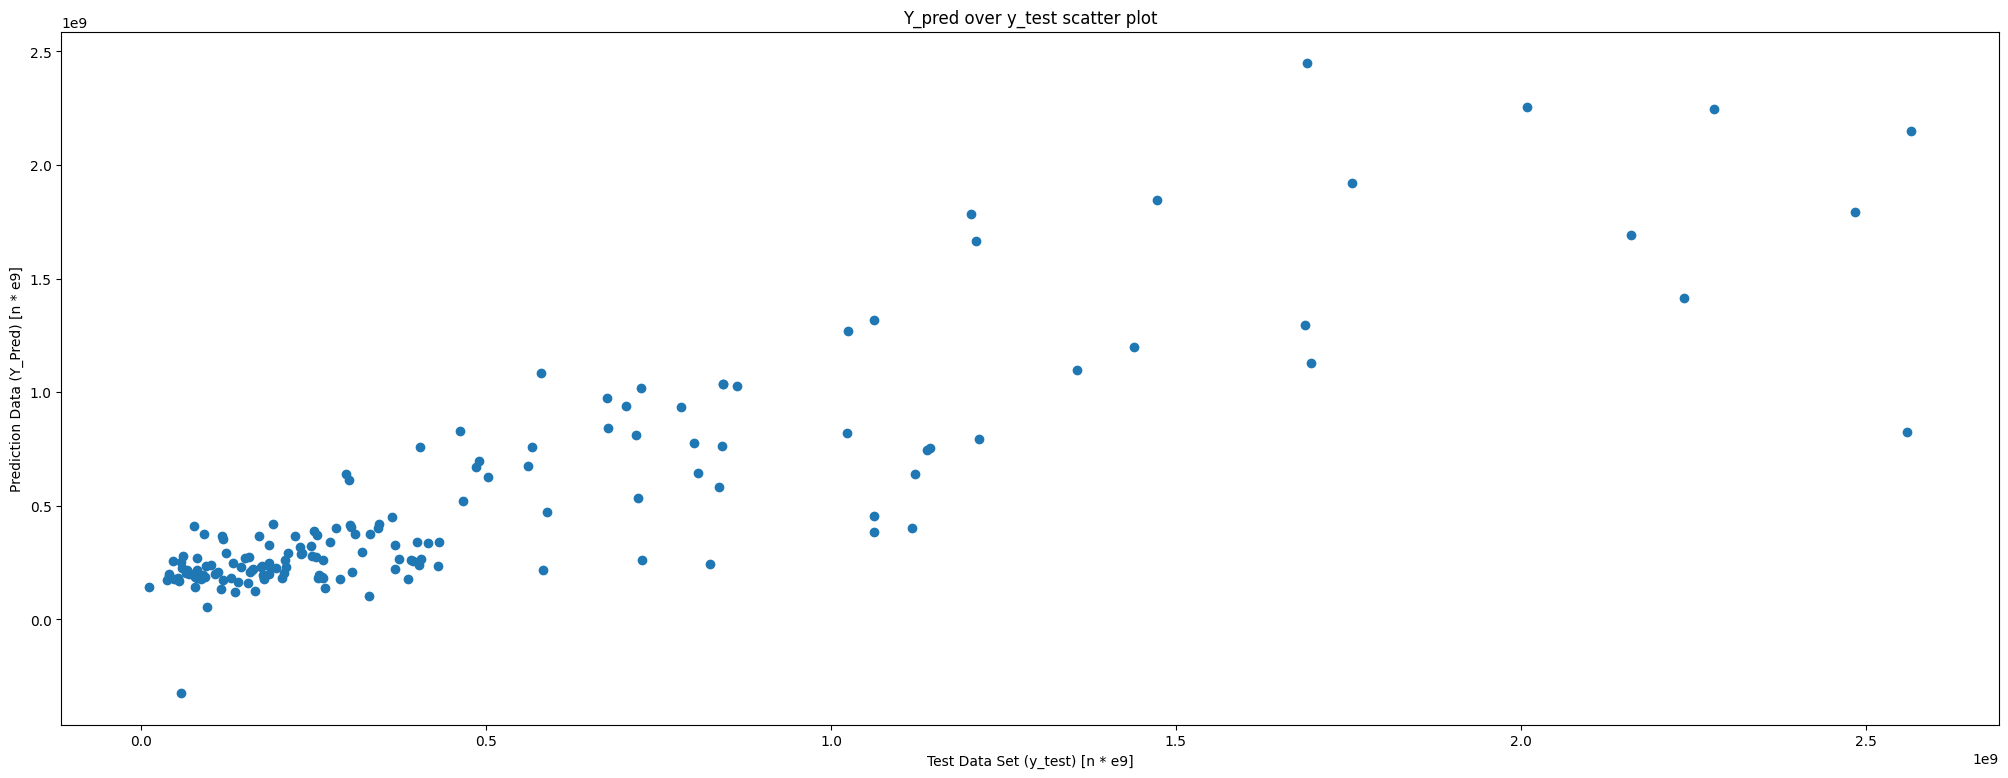

In [135]:
#Plotting Graph Y Pred of Y Test


plt.figure(figsize=(25, 9))
plt.scatter(x=y_test, y=Y_pred)
plt.xlabel("Test Data Set (y_test) [n * e9]")
plt.ylabel("Prediction Data (Y_Pred) [n * e9]")
plt.title("Y_pred over y_test scatter plot")
plt.show()


##### With this Linear Regression set up, we would be able to take in user information based on song statistics and predict how many streams it would get based on that criteria.